# Project 1
Andrew Pascual

### Yelp Business Rating Prediction using Tensorflow


- We aim to predict a business's stars rating based on all review text for that business

## Load dataset

In [2]:
import json
import csv
import pandas as pd
import numpy as np
import os
import string

In [3]:
#JSON to CSV of Review file

outfile = open("review_stars.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id','stars', 'text'])
with open('yelp_academic_dataset_review.json',encoding="utf-8") as f:
    for line in f:
        row = json.loads(line)
        sfile.writerow([row['business_id'], row['stars'], (row['text']).encode('utf-8')])
outfile.close()

In [4]:
df_review_stars = pd.read_csv('review_stars.tsv', delimiter ="\t", encoding="utf-8")

In [5]:
#JSON to CSV of Business file

outfile = open("business.tsv", 'w')
sfile = csv.writer(outfile, delimiter ="\t", quoting=csv.QUOTE_MINIMAL)
sfile.writerow(['business_id', 'name','stars','categories','review_count'])
with open('yelp_academic_dataset_business.json',encoding="utf-8") as f:
    for line in f:
        row = json.loads(line)
        sfile.writerow([row['business_id'], row['name'].encode('utf-8'), row['stars'], row['categories'],row['review_count']])
outfile.close()

In [6]:
df_business = pd.read_csv('business.tsv', delimiter ="\t", encoding= "utf-8")

Group all of the reviews by each business

In [7]:
df_review_agg = df_review_stars.groupby('business_id')['text'].sum()
df_ready_for_sklearn = pd.DataFrame({'business_id': df_review_agg.index, 'all_reviews':df_review_agg.values})

### Data Cleaning

In [8]:
#Remove any business with less than 20 reviews
df_business.drop(df_business[df_business['review_count'] < 20].index, inplace = True)

In [9]:
#Merge the aggregate reviews and business dataframes
df_review_business = pd.merge(df_ready_for_sklearn, df_business, on='business_id')

Print shapes and information for current dataframes

In [10]:
print(df_review_stars.shape)
print(df_business.shape)
print(df_review_business.shape)
print(df_review_stars.stars.value_counts())

(8021122, 3)
(66117, 5)
(66117, 6)
5.0    3586460
4.0    1673404
1.0    1283897
3.0     842289
2.0     635072
Name: stars, dtype: int64


## TF-IDF

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

C:\Users\andrewpascual\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\andrewpascual\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\andrewpascual\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\andrewpascual\Anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [19]:
#Begin feature extraction

import sklearn.feature_extraction.text as sk_text
vectorizer = sk_text.TfidfVectorizer(stop_words='english', max_features = 500)

#min_df: ignore terms that have a document frequency < min_df.
#max_df: ignore terms that have a document frequency > max_df

In [20]:
matrix = vectorizer.fit_transform(df_review_business['all_reviews'])
print(type(matrix))               # Compressed Sparse Row matrix

<class 'scipy.sparse.csr.csr_matrix'>


In [21]:
tfidf_data = matrix.toarray()     #  convert it to numpy array
print(tfidf_data)

[[0.         0.00866529 0.04865407 ... 0.         0.         0.        ]
 [0.02335423 0.01256113 0.00881606 ... 0.01216804 0.01183077 0.        ]
 [0.         0.01380149 0.01291549 ... 0.         0.01733202 0.        ]
 ...
 [0.         0.01446045 0.00676607 ... 0.0124515  0.01815955 0.0078816 ]
 [0.00764521 0.02826994 0.         ... 0.         0.02259193 0.00840458]
 [0.         0.         0.         ... 0.01560726 0.00758733 0.        ]]


In [22]:
x = tfidf_data
x.shape

(66117, 500)

In [23]:
y = df_review_business['stars']
y.shape

(66117,)

In [24]:
print(vectorizer.get_feature_names())

['00', '10', '12', '15', '20', '30', '50', 'able', 'absolutely', 'actually', 'add', 'ago', 'amazing', 'appetizer', 'appointment', 'area', 'arrived', 'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic', 'available', 'average', 'away', 'awesome', 'bacon', 'bad', 'bar', 'bbq', 'beautiful', 'beef', 'beer', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bite', 'bowl', 'bread', 'breakfast', 'bring', 'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business', 'busy', 'buy', 'cake', 'called', 'came', 'car', 'card', 'care', 'change', 'charge', 'cheap', 'check', 'cheese', 'chef', 'chicken', 'chinese', 'chips', 'chocolate', 'choice', 'choose', 'clean', 'close', 'coffee', 'cold', 'come', 'comes', 'comfortable', 'coming', 'company', 'completely', 'cooked', 'cool', 'cost', 'couldn', 'counter', 'couple', 'course', 'crab', 'cream', 'crispy', 'customer', 'customers', 'cut', 'day', 'days', 'deal', 'decent', 'decided', 'decor', 'definitely', 'delicious', 'dessert', 'did', 'didn', '

## Splitting Data, Regression Models, and Hyperparameters

### Splitting the Data

In [25]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Tuning Hyperparameters

In [26]:
#Model 1 with relu and adam
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)
# Predict and measure RMSE
pred1 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred1,y_test))
print("Score (RMSE): {}".format(score))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 2s - loss: 0.4107 - val_loss: 0.1004
Epoch 2/100
52893/52893 - 2s - loss: 0.0896 - val_loss: 0.0813
Epoch 3/100
52893/52893 - 2s - loss: 0.0780 - val_loss: 0.0767
Epoch 4/100
52893/52893 - 2s - loss: 0.0737 - val_loss: 0.0845
Epoch 5/100
52893/52893 - 2s - loss: 0.0710 - val_loss: 0.0748
Epoch 6/100
52893/52893 - 2s - loss: 0.0680 - val_loss: 0.0748
Epoch 7/100
52893/52893 - 2s - loss: 0.0659 - val_loss: 0.0745
Epoch 8/100
52893/52893 - 2s - loss: 0.0641 - val_loss: 0.0779
Epoch 9/100
52893/52893 - 2s - loss: 0.0621 - val_loss: 0.0788
Epoch 10/100
52893/52893 - 2s - loss: 0.0603 - val_loss: 0.0841
Epoch 00010: early stopping
Score (RMSE): 0.2900747531928136


In [27]:
#Model 2 with relu and sgd
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

# Predict and measure RMSE
pred2 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred2,y_test))
print("Score (RMSE): {}".format(score))

Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 2s - loss: 0.3212 - val_loss: 0.1589
Epoch 2/100
52893/52893 - 2s - loss: 0.1220 - val_loss: 0.1124
Epoch 3/100
52893/52893 - 2s - loss: 0.1074 - val_loss: 0.1001
Epoch 4/100
52893/52893 - 2s - loss: 0.0978 - val_loss: 0.0967
Epoch 5/100
52893/52893 - 2s - loss: 0.0917 - val_loss: 0.0962
Epoch 6/100
52893/52893 - 2s - loss: 0.0881 - val_loss: 0.0875
Epoch 7/100
52893/52893 - 2s - loss: 0.0848 - val_loss: 0.0843
Epoch 8/100
52893/52893 - 2s - loss: 0.0833 - val_loss: 0.0823
Epoch 9/100
52893/52893 - 2s - loss: 0.0815 - val_loss: 0.0827
Epoch 10/100
52893/52893 - 2s - loss: 0.0803 - val_loss: 0.0827
Epoch 00010: early stopping
Score (RMSE): 0.28760638322657933


In [28]:
#Model 3 with sigmoid and adam
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

# Predict and measure RMSE
pred3 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred3,y_test))
print("Score (RMSE): {}".format(score))

Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 2s - loss: 1.6545 - val_loss: 0.6639
Epoch 2/100
52893/52893 - 2s - loss: 0.6503 - val_loss: 0.6635
Epoch 3/100
52893/52893 - 2s - loss: 0.4703 - val_loss: 0.1106
Epoch 4/100
52893/52893 - 2s - loss: 0.0887 - val_loss: 0.0805
Epoch 5/100
52893/52893 - 2s - loss: 0.0772 - val_loss: 0.0795
Epoch 6/100
52893/52893 - 2s - loss: 0.0743 - val_loss: 0.0747
Epoch 7/100
52893/52893 - 2s - loss: 0.0727 - val_loss: 0.0748
Epoch 8/100
52893/52893 - 2s - loss: 0.0718 - val_loss: 0.0737
Epoch 00008: early stopping
Score (RMSE): 0.2715248568690927


In [29]:
#Model 4 with sigmoid and sgd
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

# Predict and measure RMSE
pred4 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred4,y_test))
print("Score (RMSE): {}".format(score))

Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 2s - loss: 0.7022 - val_loss: 0.6638
Epoch 2/100
52893/52893 - 2s - loss: 0.6497 - val_loss: 0.6628
Epoch 3/100
52893/52893 - 2s - loss: 0.6489 - val_loss: 0.6638
Epoch 00003: early stopping
Score (RMSE): 0.8147337303015404


In [48]:
#Model 5 with tanh and adam
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

# Predict and measure RMSE
pred5 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred5,y_test))
print("Score (RMSE): {}".format(score))

Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 3s - loss: 0.6652 - val_loss: 0.0985
Epoch 2/100
52893/52893 - 2s - loss: 0.0825 - val_loss: 0.0778
Epoch 3/100
52893/52893 - 2s - loss: 0.0749 - val_loss: 0.0743
Epoch 4/100
52893/52893 - 2s - loss: 0.0730 - val_loss: 0.0731
Epoch 5/100
52893/52893 - 2s - loss: 0.0717 - val_loss: 0.0751
Epoch 6/100
52893/52893 - 2s - loss: 0.0711 - val_loss: 0.0743
Epoch 00006: early stopping
Score (RMSE): 0.2725159641282756


In [31]:
#Model 6 with tanh and sgd
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=100)

# Predict and measure RMSE
pred6 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred6,y_test))
print("Score (RMSE): {}".format(score))

Train on 52893 samples, validate on 13224 samples
Epoch 1/100
52893/52893 - 2s - loss: 0.3190 - val_loss: 0.1190
Epoch 2/100
52893/52893 - 2s - loss: 0.1131 - val_loss: 0.1068
Epoch 3/100
52893/52893 - 2s - loss: 0.1039 - val_loss: 0.0995
Epoch 4/100
52893/52893 - 2s - loss: 0.0988 - val_loss: 0.0947
Epoch 5/100
52893/52893 - 2s - loss: 0.0949 - val_loss: 0.0924
Epoch 6/100
52893/52893 - 2s - loss: 0.0918 - val_loss: 0.0900
Epoch 7/100
52893/52893 - 2s - loss: 0.0887 - val_loss: 0.0873
Epoch 8/100
52893/52893 - 2s - loss: 0.0864 - val_loss: 0.0876
Epoch 9/100
52893/52893 - 2s - loss: 0.0843 - val_loss: 0.0834
Epoch 10/100
52893/52893 - 2s - loss: 0.0826 - val_loss: 0.0823
Epoch 11/100
52893/52893 - 2s - loss: 0.0813 - val_loss: 0.0817
Epoch 12/100
52893/52893 - 2s - loss: 0.0803 - val_loss: 0.0817
Epoch 00012: early stopping
Score (RMSE): 0.28580399923562455


## Analysis of hypertunings


Based on the predicted RMSE, we have chosen the best model to be sigmoid and adam. This is due to the RMSE being the lowest out of the six possible hyperparameter tunings. Sigmoid and adam RMSE = 0.2684570471071739

#### Find 5 business, showing their names, predicted ratings, and actual ratings

In [40]:
#predicted star ratings
pred5 = model.predict(x_test)
print("Shape: {}".format(pred3.shape))
print(pred5)

Shape: (13224, 1)
[[4.2559037]
 [4.0565376]
 [3.302147 ]
 ...
 [4.0261517]
 [3.710733 ]
 [3.8521886]]


In [33]:
b_id = df_review_business['business_id']
b_id
b_name = df_review_business['name']
b_name
b_astars = df_review_business['stars']
b_astars

0        4.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
66112    4.5
66113    3.5
66114    4.0
66115    3.0
66116    3.5
Name: stars, Length: 66117, dtype: float64

In [34]:
# print out all prediction
df_bid = pd.DataFrame(b_id, columns=['business_id'])
df_y = pd.DataFrame(b_name, columns=['name'])
df_pred = pd.DataFrame(pred3, columns=['predicted stars'])
result = pd.concat([df_y, df_bid,df_pred,b_astars],axis=1)

In [35]:
result [189:194]

,name,business_id,predicted stars,stars
189,b'iNails & Spa',-AeZXaqxrLxxXEVH9KmK-g,4.755480,3.5
190,b'Soupesoup',-AgfhwHOYrsPKt-_xV_Ipg,4.047420,4.0
191,b'Wildflower - Rivulon',-AliE9BXGQl8pIrdlpCOxQ,4.340148,4.0
192,"b""Ike's Love & Sandwiches""",-ArzVOksIBWmtM1ey90vDQ,4.482233,4.5
193,b'Mexico City',-AtzcXIwEP6yO7rM9CM9ww,3.669749,4.0


In [43]:
#Printing the best RMSE
pred5 = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred5,y_test))
print("Score (RMSE): {}".format(score))

Score (RMSE): 0.28580399923562455


In [44]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import io
import requests
import tensorflow as tf

# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y})
    if sort:
        t.sort_values(by=['y'],inplace=True)
   
    b = plt.plot(t['pred'].tolist(),label='prediction')
    a = plt.plot(t['y'].tolist(),label='expected')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [45]:
print(type(pred5))

<class 'numpy.ndarray'>


In [46]:
pred5.shape

(13224, 1)

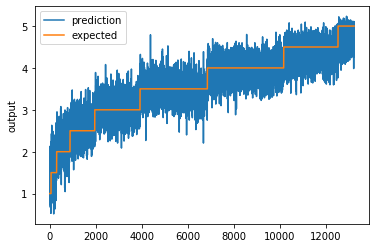

In [47]:
chart_regression(pred5.flatten(),y_test,sort=True)